# Évalutation et visualisation des données récupérées depuis babelio

## Importation des données et des modules

In [1]:
import matplotlib.pyplot as plt

from Data.stats import *
from statistics import *
from collections import *

with open('babelio_livres.json', 'r') as f:
    Babelio_books = json.load(f, encoding="utf-8")

with open('babelio_auteurs.json', 'r') as f:
    Babelio_authors = json.load(f, encoding="utf-8")

In [2]:
stats_book = get_babelio_stats_from_items(Babelio_books)
stats_author = get_babelio_stats_from_items(Babelio_authors)

In [3]:
stats_book_formated = format_result(stats_book)
stats_author_formated = format_result(stats_author)

## Nombre de champs non-nuls et compte des valeures de ces champs

### Pour les livres:

In [4]:
print(json.dumps(stats_book_formated, indent=2))

{
  "total": 5553,
  "url": 5553,
  "url_by_value": {
    "https://www.babelio.com/livres/Sevigny-Sans-terre/887589": 1,
    "https://www.babelio.com/livres/Leroux-Madame-Victoria/768705": 1,
    "https://www.babelio.com/livres/Tremblay-Hotel-Bristol-New-York-N-Y/160254": 1,
    "https://www.babelio.com/livres/Tremblay-Le-passage-oblige/244745": 1,
    "https://www.babelio.com/livres/Beaudoin-Hadassa/124739": 1,
    "https://www.babelio.com/livres/Senecal-Quinze-minutes/459141": 1,
    "https://www.babelio.com/livres/Dompierre-Un-petit-pas-pour-lhomme/46346": 1,
    "https://www.babelio.com/livres/Boulerice-Javotte/417516": 1,
    "https://www.babelio.com/livres/Tremblay-Le-coeur-decouvert/37083": 1,
    "https://www.babelio.com/livres/Proulx-Ce-quil-reste-de-moi/708379": 1
  },
  "titre": 5553,
  "titre_by_value": {
    " Po\u00e8mes ": 4,
    " Po\u00e9sies compl\u00e8tes ": 3,
    " Nous ": 3,
    " Po\u00e8mes choisis ": 2,
    " Yukonnaise ": 2,
    " Kamouraska ": 2,
    " Maria 

### Pour les auteurs:

In [5]:
print(json.dumps(stats_author_formated, indent=2))

{
  "total": 2768,
  "url": 2768,
  "url_by_value": {
    "https://www.babelio.com/auteur/Simon-Roy/326355": 1,
    "https://www.babelio.com/auteur/Milena-Babin/302343": 1,
    "https://www.babelio.com/auteur/Diane-Lavoie/284029": 1,
    "https://www.babelio.com/auteur/Veronique-Cote/226136": 1,
    "https://www.babelio.com/auteur/Charlotte-Gingras/54313": 1,
    "https://www.babelio.com/auteur/Michel-Jean/149380": 1,
    "https://www.babelio.com/auteur/Marilyne-Fortin/333365": 1,
    "https://www.babelio.com/auteur/ric-Plamondon/221283": 1,
    "https://www.babelio.com/auteur/Olivia-Tapiero/129690": 1,
    "https://www.babelio.com/auteur/Gilles-Archambault/2653": 1
  },
  "name": 2768,
  "name_by_value": {
    " Simon Roy": 1,
    " Mil\u00e9na Babin": 1,
    " Diane Lavoie": 1,
    " V\u00e9ronique C\u00f4t\u00e9": 1,
    " Charlotte Gingras": 1,
    " Michel Jean": 1,
    " Marilyne Fortin": 1,
    " \u00c9ric Plamondon": 1,
    " Olivia Tapiero": 1,
    " Gilles Archambault": 1
  }

## Analyse des résumés des livres (0 - 1 résumé par livre):

Moyenne du nombre de caractères:  401.30163875382675
Medianne du nombre de caractères:  460
Écart-typedu nombre de caractères:  130.44595533651858

Maximum du nombre de caractères:  475
Minimum du nombre de caractères non nul:  9

Longueure des 10 plus long résumé:  [475, 475, 475, 475, 475, 475, 475, 475, 475, 475]
Longueure des 10 plus courts résumé:  [9, 14, 19, 20, 20, 21, 23, 23, 24, 24]

Nombre de non-nul:  5260 , nombre de nul:  293

Tailles des résumés


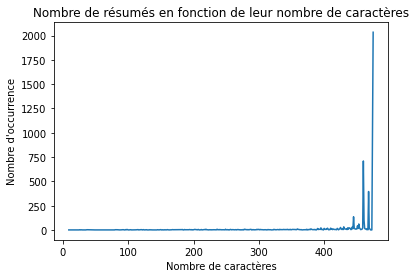

In [6]:
lenght = []
for resume in [book['resume'] for book in Babelio_books]:
    lenght.append(len(resume))
print("Moyenne du nombre de caractères: ", mean(lenght))
print("Medianne du nombre de caractères: ", median(lenght))
print("Écart-typedu nombre de caractères: ", pstdev(lenght))
print("\nMaximum du nombre de caractères: ", max(lenght))
print("Minimum du nombre de caractères non nul: ", min([x for x in lenght if (x != 0) and x]))
print("\nLongueure des 10 plus long résumé: ", sorted(lenght, reverse=True)[:10])
print("Longueure des 10 plus courts résumé: ",sorted([x for x in lenght if x != 0 and x])[:10])
print("\nNombre de non-nul: ", len([x for x in lenght if (x != 0) and x]), ", nombre de nul: ", len([x for x in lenght if (x == 0) or not x]))
print("\nTailles des résumés")
occurence_count = Counter([x for x in lenght if x != 0 and x])
x, y = zip(*sorted(occurence_count.items()))
plt.plot(x, y)
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre d'occurrence")
plt.title("Nombre de résumés en fonction de leur nombre de caractères")
plt.show()

## Analyse des commentaires des livres (0 - n résumés par livre)

### taille et nombre

In [7]:
numbers = []
lenght = []
ratings = []
for review_ls in [book['commentaire'] for book in Babelio_books]:
    if not review_ls:
        numbers.append(0)
    else:
        for review in review_ls:
            ratings.append(float(review["note"]) if review["note"] else review["note"])
            lenght.append(len(" ".join(review["contenu"])))
        numbers.append(len(review_ls))

Moyenne du nombre de commentaires:  3.0624887448226183
Medianne du nombre de commentaires:  1
Ecart-type du nombre de commentaires:  11.815934175984815

Nombre de non-nul:  2969 , nombre de nul:  7
fréquences du nombre de commentaire
Nombre de commentaires


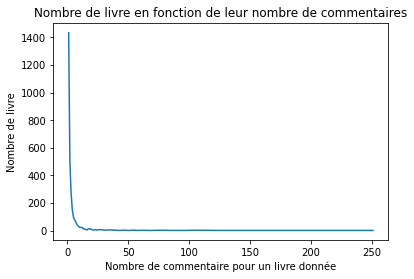

In [8]:
print("Moyenne du nombre de commentaires: ", mean(numbers))
print("Medianne du nombre de commentaires: ", median(numbers))
print("Ecart-type du nombre de commentaires: ", pstdev(numbers))
print("\nNombre de non-nul: ", len([x for x in numbers if x != 0 and x]), ", nombre de nul: ", len([x for x in lenght if x == 0 or not x]))
print("fréquences du nombre de commentaire")
print("Nombre de commentaires")
occurence_count = Counter([x for x in numbers if x != 0 and x])
x, y = zip(*sorted(occurence_count.items()))
plt.plot(x, y)
plt.xlabel("Nombre de commentaire pour un livre donnée")
plt.ylabel("Nombre de livre")
plt.title("Nombre de livre en fonction de leur nombre de commentaires")
plt.show()


Moyenne du nombre de caractères:  1806.526814065624
Medianne du nombre de caractères:  1373.0
Écart-typedu nombre de caractères:  1596.6615521621773

Maximum du nombre de caractères:  13493
Minimum du nombre de caractères non nul:  9

Nombre de non-nul:  16999 , nombre de nul:  7
Nombre de caractère par commentaire


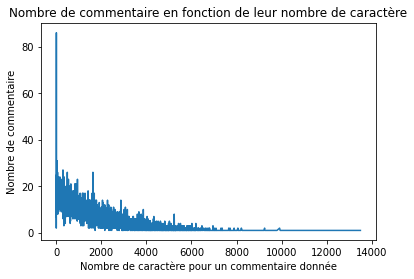

In [9]:
print("\nMoyenne du nombre de caractères: ", mean(lenght))
print("Medianne du nombre de caractères: ", median(lenght))
print("Écart-typedu nombre de caractères: ", pstdev(lenght))
print("\nMaximum du nombre de caractères: ", max(lenght))
print("Minimum du nombre de caractères non nul: ", min([x for x in lenght if x != 0 and x]))
print("\nNombre de non-nul: ", len([x for x in lenght if x != 0 and x]), ", nombre de nul: ", len([x for x in lenght if x == 0 or not x]))
print("Nombre de caractère par commentaire")
occurence_count = Counter(lenght)
x, y = zip(*sorted(occurence_count.items()))
plt.plot(x, y)
plt.xlabel("Nombre de caractère pour un commentaire donnée")
plt.ylabel("Nombre de commentaire")
plt.title("Nombre de commentaire en fonction de leur nombre de caractère")
plt.show()

### notes


Moyenne des notes:  3.8795266425245734
Médianne des notes:  4.0
Écart-type des notes:  0.9901728117050013
Maximum des notes:  5.0

Nombre de non-nul:  15464 , nombre de nul:  1542
Nombre de note


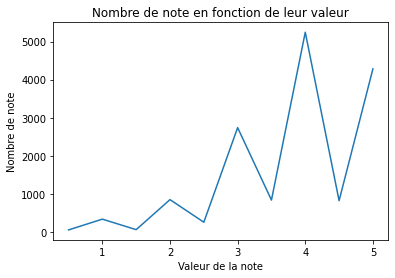

In [10]:
print("\nMoyenne des notes: ", mean([x for x in ratings if x]))
print("Médianne des notes: ", median([x for x in ratings if x]))
print("Écart-type des notes: ", pstdev([x for x in ratings if x]))
print("Maximum des notes: ", max([x for x in ratings if x]))
print("\nNombre de non-nul: ", len([x for x in ratings if x != 0 and x]), ", nombre de nul: ", len([x for x in ratings if x == 0 or not x]))
print("Nombre de note")
occurence_count = Counter([x for x in ratings if x != 0 and x])
x, y = zip(*sorted(occurence_count.items()))
plt.plot(x, y)
plt.xlabel("Valeur de la note")
plt.ylabel("Nombre de note")
plt.title("Nombre de note en fonction de leur valeur")
plt.show()

# Analyse des extraits (0 - n par livre)

In [11]:
numbers = []
lenght = []
for extracts_ls in [book['extrait'] for book in Babelio_books]:
    if not extracts_ls:
        numbers.append(0)
    else:
        for review in extracts_ls:
            lenght.append(len(" ".join(review["contenu"])))
        numbers.append(len(extracts_ls))

Moyenne du nombre de commentaires:  4.24887448226184
Médianne du nombre de commentaires:  1
Écart-typedu nombre de commentaires:  11.106641005363713

Nombre de non-nul:  2888 , nombre de nul:  5
Nombre d'extraits


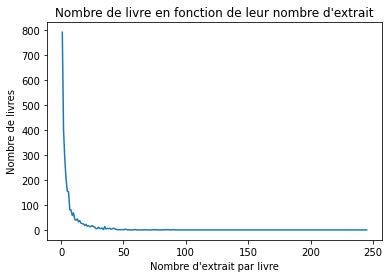

In [12]:
print("Moyenne du nombre de commentaires: ", mean(numbers))
print("Médianne du nombre de commentaires: ", median(numbers))
print("Écart-typedu nombre de commentaires: ", pstdev(numbers))
print("\nNombre de non-nul: ", len([x for x in numbers if x != 0 and x]), ", nombre de nul: ", len([x for x in lenght if x == 0 or not x]))
print("Nombre d'extraits")
occurence_count = Counter([x for x in numbers if x != 0 and x])
x, y = zip(*sorted(occurence_count.items()))
plt.plot(x, y)
plt.xlabel("Nombre d'extrait par livre")
plt.ylabel("Nombre de livres")
plt.title("Nombre de livre en fonction de leur nombre d'extrait")
plt.show()


Moyenne du nombre de caractères:  646.6120623887429
Médianne du nombre de caractères:  469.0
Écart-typedu nombre de caractères:  692.1644722292436

Maximum du nombre de caractères:  18157
Minimum du nombre de caractères non nul:  13

Nombre de non-nul:  23589 , nombre de nul:  5
fréquences des tailles de résumés


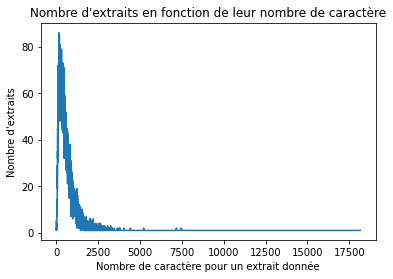

In [13]:
print("\nMoyenne du nombre de caractères: ", mean(lenght))
print("Médianne du nombre de caractères: ", median(lenght))
print("Écart-typedu nombre de caractères: ", pstdev(lenght))
print("\nMaximum du nombre de caractères: ", max(lenght))
print("Minimum du nombre de caractères non nul: ", min([x for x in lenght if x != 0 and x]))
print("\nNombre de non-nul: ", len([x for x in lenght if x != 0 and x]), ", nombre de nul: ", len([x for x in lenght if x == 0 or not x]))
print("fréquences des tailles de résumés")
occurence_count = Counter(lenght)
x, y = zip(*sorted(occurence_count.items()))
plt.plot(x, y)
plt.xlabel("Nombre de caractère pour un extrait donnée")
plt.ylabel("Nombre d'extraits")
plt.title("Nombre d'extraits en fonction de leur nombre de caractère")
plt.show()